### Задание  

Решить задачу для стационарного уравнения Шредингера с помощью вариационного метода, используя указанные в варианте пробные функции.

Сравнить энергии основного состояния, полученные с помощью разных пробных функций.  
Указать, какие функции дают более точный результат. Для обеих функций построить графики волновых функций основного состояния.  

Для второй пробной функции на графике потенциала построить полученные уровни энергии, а также волновые функции основного, первого и второго возбужденных состояний.

$-{\psi}^{''}+V(x)\psi=E\psi,\quad 0<x<+\infty,$  
$V(x)=x^3,$  
$\psi\to0\quad\text{при}\quad x\to +\infty,\quad \psi(0)=0.$  
1) $\phi(x)=x\exp(-ax)$  
2) $\phi_k(x)=P_{2k+1}(x)\exp(-x),\quad k=0,1,...,9.\quad(\text{Полиномы Лежандра})$

0.0013906303343699821 - энергия основного состояния


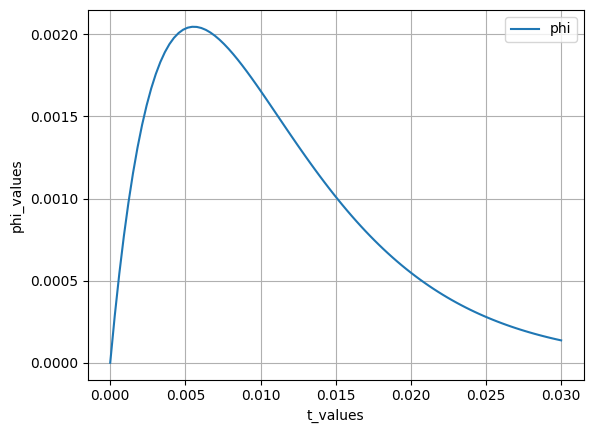

In [71]:
# 1

import numpy as np
import matplotlib.pyplot as plt
import sympy
from scipy.linalg import eigh
from scipy.optimize import minimize


x = sympy.symbols('x')
a = sympy.symbols('a')
phi = x*sympy.exp(-a*x)
f = sympy.lambdify(a, sympy.integrate(phi * (-sympy.diff(phi, x, 2) + x**3 * phi), (x, 0, sympy.oo), conds='none'), 'numpy')

f_value = minimize(f, 1).fun
a_value = minimize(f, 1).x[0]

print(f"{f_value} - энергия основного состояния")

phi = sympy.lambdify(x, phi.subs(a, a_value), 'numpy')

t = np.linspace(0, 0.03, 100)
phi_values = phi(t)

plt.plot(t, phi_values, label='phi')
plt.xlabel('t_values')
plt.ylabel('phi_values')
plt.legend()
plt.grid(True)
plt.show()

3.706768528586346 16.15291908388348 66.09488736878822


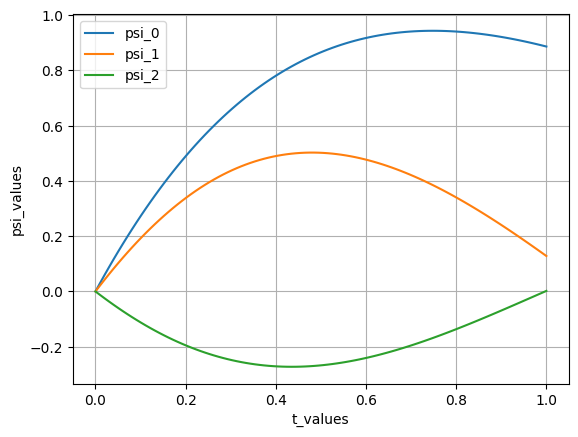

In [72]:
# 2

x = sympy.symbols('x')
n = 10
phi = []
h_phi = []
a_matrix = np.zeros((n,n))
g_matrix = np.zeros((n,n))

for i in range(n):
    phi_expr = sympy.legendre(2*i + 1, x) * sympy.exp(-x)
    h_phi_expr = sympy.simplify(-sympy.diff(phi_expr, x, 2) + x**3 * phi_expr)
    matrix_element = sympy.integrate(phi_expr * h_phi_expr, (x, 0, sympy.oo))
    
    phi.append(phi_expr)
    h_phi.append(h_phi_expr)

for i in range(n):
    for j in range(n):
        a_matrix[i,j] = sympy.integrate(phi[i] * h_phi[j], (x, 0, sympy.oo))
        g_matrix[i,j] = sympy.integrate(phi[i] * phi[j], (x, 0, sympy.oo))

eigenvalues, eigenvector = eigh(a_matrix, b=g_matrix)
v0 = eigenvector[:,0]
v1 = eigenvector[:,1]
v2 = eigenvector[:,2]

print(eigenvalues[0], eigenvalues[1], eigenvalues[2])

psi_0, psi_1, psi_2 = phi[0], phi[0], phi[0]
for i in range(n):
    psi_0 += v0[i] * phi[i]
    psi_1 += v1[i] * phi[i]
    psi_2 += v2[i] * phi[i]
psi_0 -= phi[0]
psi_1 -= phi[0]
psi_2 -= phi[0]

psi_0 = sympy.lambdify(x, sympy.simplify(psi_0))
psi_1 = sympy.lambdify(x, sympy.simplify(psi_1))
psi_2 = sympy.lambdify(x, sympy.simplify(psi_2))

t = np.linspace(0, 1, 100)
psi_0_values = psi_0(t)
psi_1_values = psi_1(t)
psi_2_values = psi_2(t)

plt.plot(t, psi_0_values, label='psi_0')
plt.plot(t, psi_1_values, label='psi_1')
plt.plot(t, psi_2_values, label='psi_2')
plt.xlabel('t_values')
plt.ylabel('psi_values')
plt.legend()
plt.grid(True)
plt.show()